<a href="https://colab.research.google.com/github/Guadalescano/water_quality/blob/main/water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h1>Clasificación de Agua Potable</h1>
<h2>🚰El objetivo de este proyecto es predecir si una muestra de agua es potable basándonos en características físico-químicas y ambientales.</h2>

In [2]:
df = pd.read_csv('https://media.githubusercontent.com/media/micaelakorol21/dataset_water_quality/refs/heads/main/Water_quality.csv')

<p style="font-size:20px;">🔍Exploración de los datos:</p>

In [3]:
df.shape
# El dataset poseé: 24 columnas y 698.575 filas.

(698575, 24)

In [4]:
# Tipos de datos de cada columna:
df.dtypes

,0
Index,int64
pH,float64
Iron,float64
Nitrate,float64
Chloride,float64
Lead,float64
Zinc,float64
Color,object
Turbidity,float64
Fluoride,float64


In [5]:
# Columnas que tienen datos faltantes
df.isna().sum()

,0
Index,0
pH,13438
Iron,4684
Nitrate,12430
Chloride,20467
Lead,3107
Zinc,18498
Color,660
Turbidity,5798
Fluoride,21996


In [6]:
max_missing = df.isna().sum().max()  # Calculo el maximo valor faltante
print(f"El valor maximo de faltantes es de {max_missing}")

El valor maximo de faltantes es de 23291


<p>Renombramos las columnas</p>

In [7]:
df = df.rename(columns={
    'Index': 'Índice',
    'pH': 'pH',
    'Iron': 'Plata',
    'Nitrate': 'Nitrato',
    'Chloride': 'Cloruros',
    'Lead': 'Plomo',
    'Zinc': 'Zinc',
    'Color': 'Color',
    'Turbidity': 'Turbidez',
    'Fluoride': 'Fluoruro',
    'Copper': 'Cobre',
    'Odor': 'Olor',
    'Sulfate': 'Sulfatos',
    'Conductivity': 'Conductividad',
    'Chlorine': 'Cloro residual libre',
    'Manganese': 'Manganeso',
    'Total Dissolved Solids': 'Sólidos disueltos totales',
    'Source': 'Fuente',
    'Water Temperature': 'Temperatura del agua',
    'Air Temperature': 'Temperatura del aire',
    'Month': 'Mes',
    'Day': 'Día',
    'Time of Day': 'Hora del día',
    'Target': 'Objetivo'
})

<b style="font-size:16px">El conjunto de datos incluye 24 columnas, de las cuales 23 son variables predictoras y 1 es la variable objetivo que indica si el agua <b style='color:red'> es potable (1) o no (0)  </b> .</b>

In [8]:
df.columns

Index(['Índice', 'pH', 'Plata', 'Nitrato', 'Cloruros', 'Plomo', 'Zinc',
       'Color', 'Turbidez', 'Fluoruro', 'Cobre', 'Olor', 'Sulfatos',
       'Conductividad', 'Cloro residual libre', 'Manganeso',
       'Sólidos disueltos totales', 'Fuente', 'Temperatura del agua',
       'Temperatura del aire', 'Mes', 'Día', 'Hora del día', 'Objetivo'],
      dtype='object')

<b style="font-size:16px;"> Análisis de la variable objetivo: Objetivo</b>

In [9]:
# Conteo de clases
df['Objetivo'].value_counts()

,count
Objetivo,
0,457841
1,240734


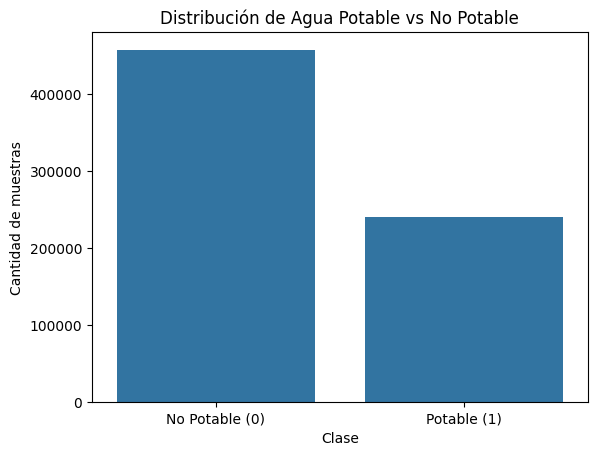

In [10]:
sns.countplot(data=df, x='Objetivo')
plt.title('Distribución de Agua Potable vs No Potable')
plt.xticks([0, 1], ['No Potable (0)', 'Potable (1)'])
plt.ylabel('Cantidad de muestras')
plt.xlabel('Clase')
plt.show()

<b style='font-size:16px'>El dataset está desbalanceado: hay más muestras de agua no potable (457841) que de agua potable (240734).</b>

<b style="font-size:22px">Limpieza de los datos de la columna pH </b>

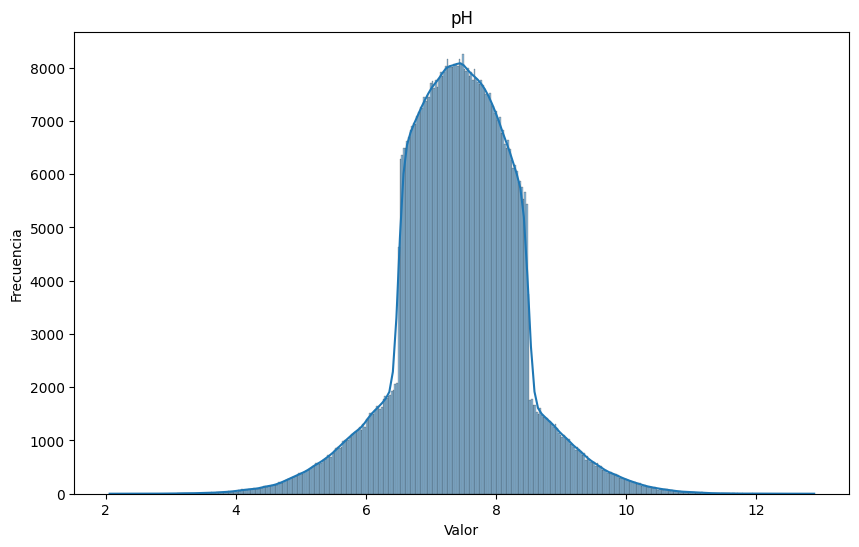

In [11]:
# Observamos la distribuición de la columna pH:
plt.figure(figsize=(10, 6))
sns.histplot(df['pH'], kde=True)
plt.title('pH')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [12]:
df['pH'].describe()

,pH
count,685137.000000
mean,7.442448
std,0.911493
min,2.058008
25%,6.880107
50%,7.447080
75%,8.023730
max,12.891960


In [13]:
#Eliminar outliers de la fila pH

col = 'pH'  # ejemplo
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
df['pH'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['pH'].describe()

,pH
count,667067.000000
mean,7.449839
std,0.803099
min,5.164678
25%,6.899036
50%,7.450028
75%,8.010550
max,9.739132


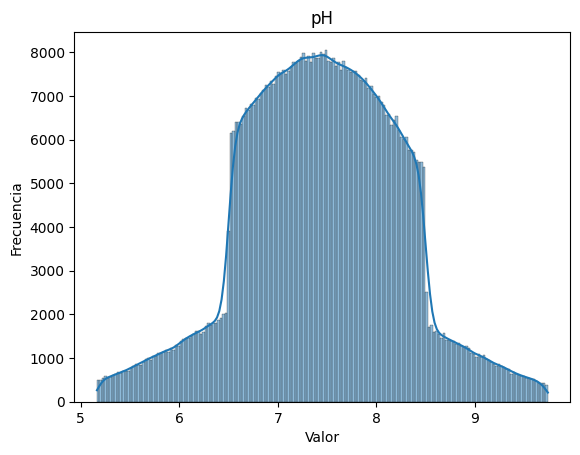

In [14]:
plt.figure()
sns.histplot(df['pH'], kde=True)
plt.title('pH')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

*
<p>Análisis de pH 📝 Después de eliminar los valores nulos y los outliers en la columna pH, se observaron variaciones significativas en las estadísticas descriptivas. Se eliminaron aproximadamente 18.070 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, hubo un ligero aumento, pasando de 7.4424 a 7.4498, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por debajo del promedio general. La desviación estándar también se redujo notablemente de 0.911 a 0.803, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo cambió de 2.05 a 5.16 y el máximo de 12.89 a 9.73, lo que confirma que se eliminaron los valores más extremos en ambos extremos del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable</p>

In [15]:
ph_nulos = df['pH'].isnull().sum()
print(f"Cantidad de valores nulos en pH: {ph_nulos}")
# Eliminar nulos d la columna pH
df_sinpHnulos = df.dropna(subset=['pH'])

Cantidad de valores nulos en pH: 0


In [16]:
*#ELIMINAR ESTO? PORQUE CREO QUE LA LIMPIEZA SE HACE SOBRE EL DATASET YA, O HACEMOS MASCARAS? - GUADA

df_sinpHnulos = df_sinpHnulos['pH'].isnull().sum()
df_sinpHnulos
# Hacer mascara: eliminar pH <5 y >10

SyntaxError: invalid syntax (<ipython-input-16-a4cf9f69db49>, line 1)

<b style="font-size:22px">Limpieza de los datos de la columna Plata</b>



In [17]:
df['Plata'].describe()

,Plata
count,6.626040e+05
mean,1.320244e-01
std,4.859343e-01
min,8.010000e-45
25%,1.010000e-05
50%,2.325443e-03
75%,5.635290e-02
max,1.574860e+01


In [18]:
col_p = 'Plata'
q1p = df[col_p].quantile(0.25)
q3p = df[col_p].quantile(0.75)
iqrp = q3p - q1p
df = df[(df[col_p] >= q1p - 1.5 * iqrp) & (df[col_p] <= q3p + 1.5 * iqrp)]
print(df[col_p].describe())

count    5.562300e+05
mean     1.553449e-02
std      3.011400e-02
min      8.010000e-45
25%      2.530000e-06
50%      5.901445e-04
75%      1.409545e-02
max      1.408669e-01
Name: Plata, dtype: float64


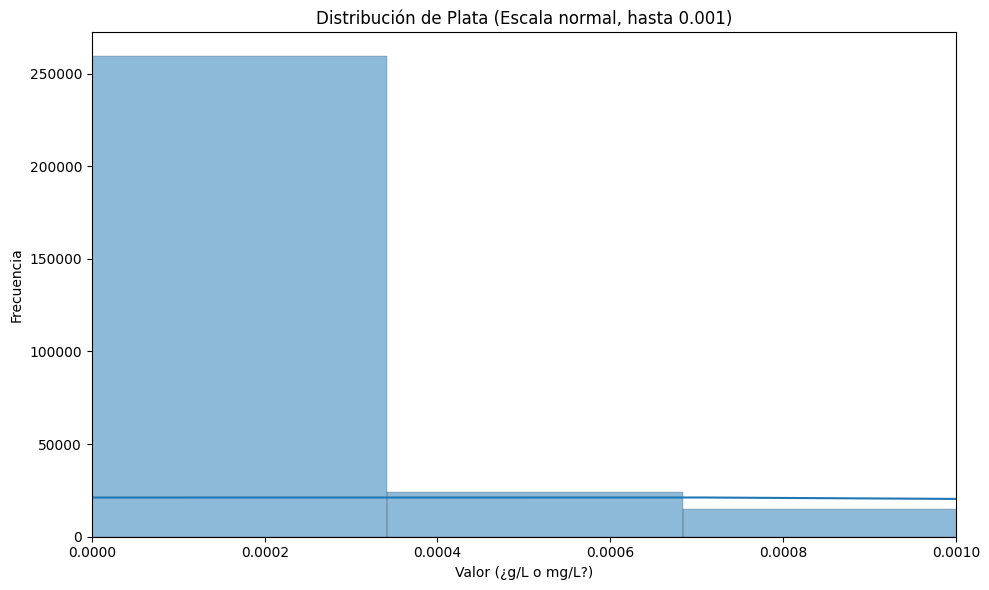

In [19]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma normal acotado hasta 0.001
sns.histplot(df['Plata'], kde=True, ax=ax)

# Acotar eje X para observar mejor valores pequeños
ax.set_xlim(0, 0.001)

# Agregar títulos y etiquetas
ax.set_title('Distribución de Plata (Escala normal, hasta 0.001)')
ax.set_xlabel('Valor (¿g/L o mg/L?)')  # Cambiar al confirmar la unidad
ax.set_ylabel('Frecuencia')

# Ajustar presentación
plt.tight_layout()
plt.show()

<b style="font-size:22px">Limpieza de los datos de la columna Nitrato

</b>


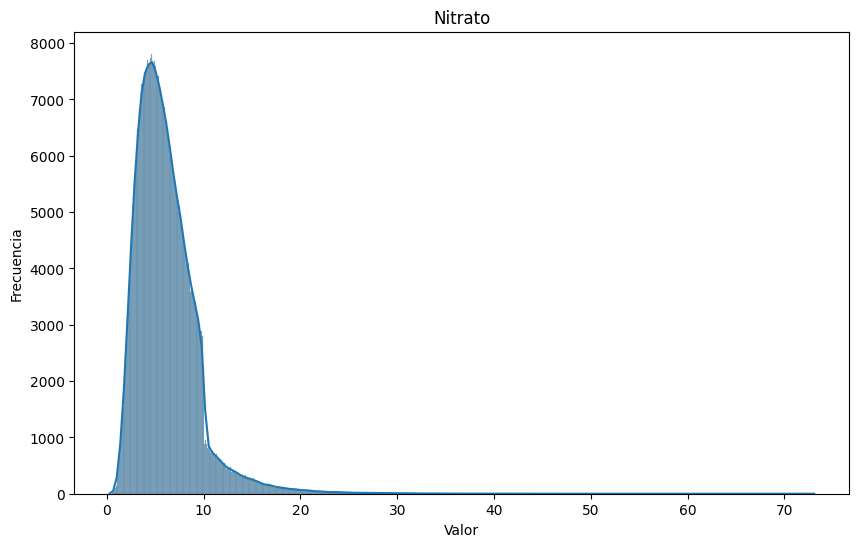

In [20]:
# Observamos la distribuición de la columna Nitrato:
plt.figure(figsize=(10, 6))
sns.histplot(df['Nitrato'], kde=True)
plt.title('Nitrato')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [21]:
df['Nitrato'].describe()

,Nitrato
count,546223.000000
mean,6.136038
std,3.215009
min,0.286173
25%,3.966220
50%,5.595346
75%,7.636367
max,73.072931


In [22]:
#Eliminar outliers de la fila Nitrato

col2 = 'Nitrato'  # ejemplo
Q1 = df[col2].quantile(0.25)
Q3 = df[col2].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col2] >= Q1 - 1.5 * IQR) & (df[col2] <= Q3 + 1.5 * IQR)]
df['Nitrato'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Nitrato'].describe()

,Nitrato
count,528853.000000
mean,5.767487
std,2.383792
min,0.286173
25%,3.913698
50%,5.485218
75%,7.403927
max,13.141506


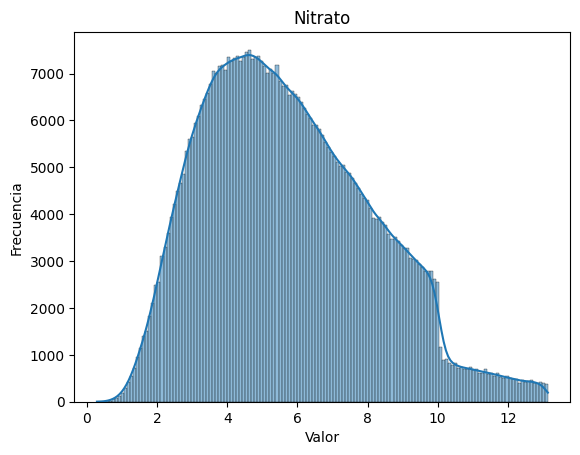

In [23]:
plt.figure()
sns.histplot(df['Nitrato'], kde=True)
plt.title('Nitrato')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

* <p>Análisis de Nitrato 📝 Después de eliminar los valores nulos y los outliers, se eliminaron aproximadamente 17,370 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, pasó de 6.13 a 5.76, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por arriba del promedio general. La desviación estándar también se redujo de 3.21 a 2.28, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo no cambió y el máximo paso de 73.07 a 13.14, lo que confirma que se eliminaron los valores más extremos en el extremo superior del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable

El limite del código alimentario argentino para nitratos es de 45 mg/l, hay que evaluar que unidad maneja el dataset para coincidir con el promedio aprox. </p>

<b style="font-size:22px">Limpieza de los datos de la columna Cloruros
</b>


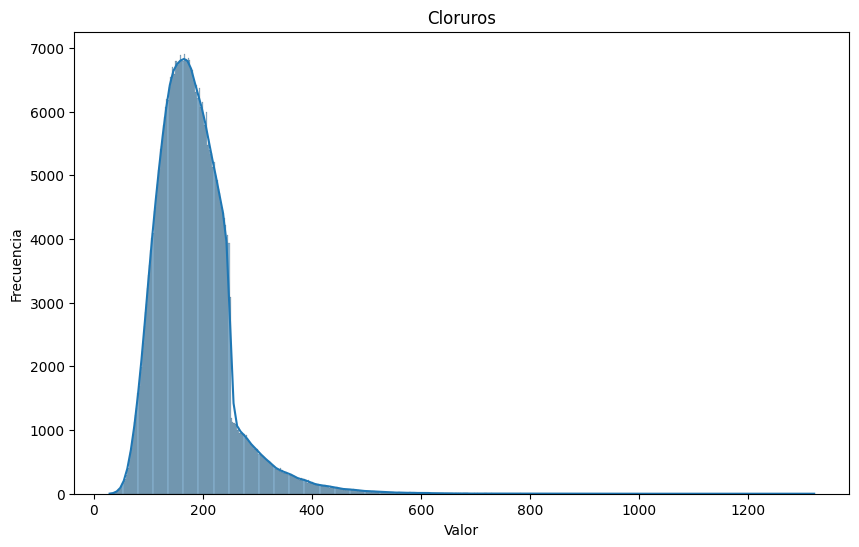

In [24]:
# Observamos la distribuición de la columna Cloruros:
plt.figure(figsize=(10, 6))
sns.histplot(df['Cloruros'], kde=True)
plt.title('Cloruros')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [25]:
df['Cloruros'].describe()

,Cloruros
count,513336.000000
mean,182.680492
std,66.684631
min,29.413497
25%,137.754491
50%,175.145528
75%,216.356432
max,1321.276280


In [26]:
#Eliminar outliers de la fila Cloruros

col3 = 'Cloruros'  # ejemplo
Q1 = df[col3].quantile(0.25)
Q3 = df[col3].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col3] >= Q1 - 1.5 * IQR) & (df[col3] <= Q3 + 1.5 * IQR)]
df['Cloruros'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Cloruros'].describe()

,Cloruros
count,497619.000000
mean,175.570696
std,52.556628
min,29.413497
25%,136.522537
50%,172.881639
75%,212.068579
max,334.247076


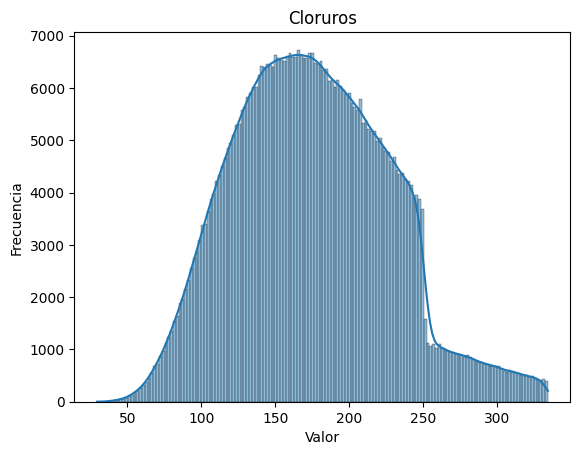

In [27]:
plt.figure()
sns.histplot(df['Cloruros'], kde=True)
plt.title('Cloruros')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

* <p>Análisis de Cloruros 📝 Después de eliminar los valores nulos y los outliers, se eliminaron 15,717 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, pasó de 182.68 a 175.57, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por arriba del promedio general. La desviación estándar también se redujo de 66.58 a 52.55, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo no cambió y el máximo paso de 1321 a 334, lo que confirma que se eliminaron los valores más extremos en el extremo superior del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable

El limite del código alimentario argentino para nitratos es de 200 mg/l, se considera que utiliza esta unidad ya que tiene coherencia. </p>

<b style="font-size:22px">Limpieza de los datos de la columna Plomo
</b>

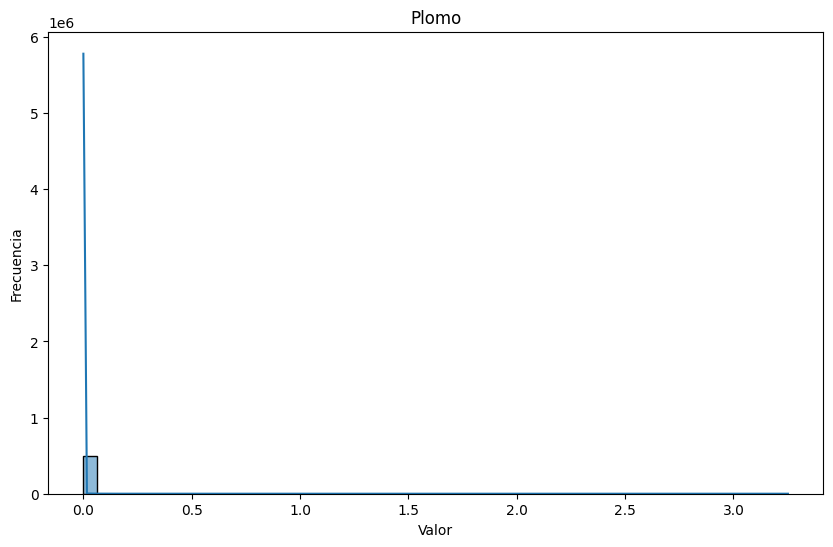

In [28]:
# Observamos la distribuición de la columna Plomo:
plt.figure(figsize=(10, 6))
sns.histplot(df['Plomo'], kde=True, bins=50)
plt.title('Plomo')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df['Plomo'].describe()

In [ ]:
#Eliminar outliers de la fila Plomo

col4 = 'Plomo'  # ejemplo
Q1 = df[col4].quantile(0.25)
Q3 = df[col4].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col4] >= Q1 - 1.5 * IQR) & (df[col4] <= Q3 + 1.5 * IQR)]
df['Plomo'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Plomo'].describe()

In [ ]:
import numpy as np

df_filtrado['Plomo_log'] = np.log10(df_filtrado['Plomo'])

sns.histplot(df_filtrado['Plomo_log'], kde=True, bins=50)
plt.title('Plomo (log10 transformado)')
plt.xlabel('log10(Plomo)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df_filtrado1 = df[(df['Plomo'] > 0) & (df['Plomo'] < 0.20)]

sns.histplot(df_filtrado1['Plomo'], kde=True, bins=50)
plt.title('Distribución de Plomo entre 0 y 0.20')
plt.xlabel('Plomo')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
# no se como graficarlo para visualizarlo bien, saque outliers y ceros

<b style="font-size:22px">Limpieza de los datos de la columna Zinc
</b>

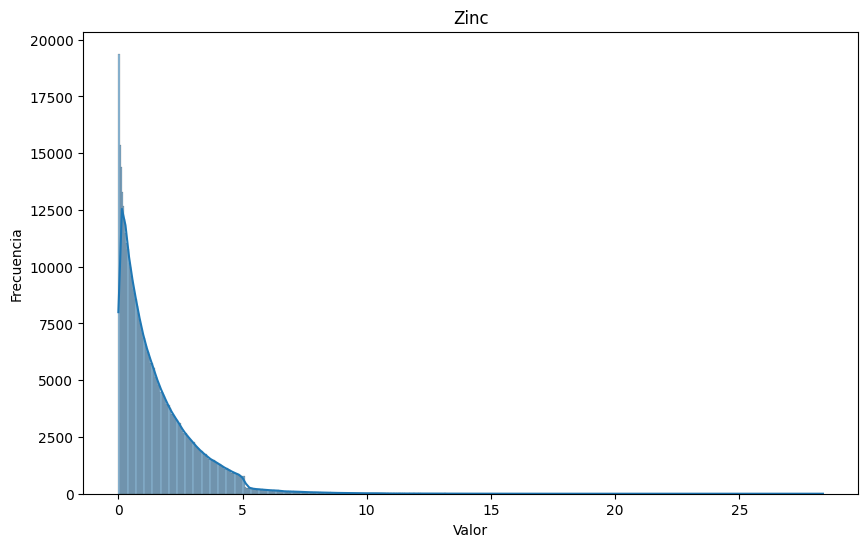

In [29]:
# Observamos la distribuición de la columna Zinc:
plt.figure(figsize=(10, 6))
sns.histplot(df['Zinc'], kde=True)
plt.title('Zinc')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [30]:
df['Zinc'].describe()

,Zinc
count,484563.000000
mean,1.531481
std,1.505043
min,0.000001
25%,0.415094
50%,1.078573
75%,2.217501
max,28.368672


In [31]:
#Eliminar outliers de la fila Zinc

col5 = 'Zinc'  # ejemplo
Q1 = df[col5].quantile(0.25)
Q3 = df[col5].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col5] >= Q1 - 2.5 * IQR) & (df[col5] <= Q3 + 2.5 * IQR)]
df['Zinc'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Zinc'].describe()

,Zinc
count,479969.000000
mean,1.463140
std,1.325814
min,0.000001
25%,0.409845
50%,1.062825
75%,2.172168
max,6.722317


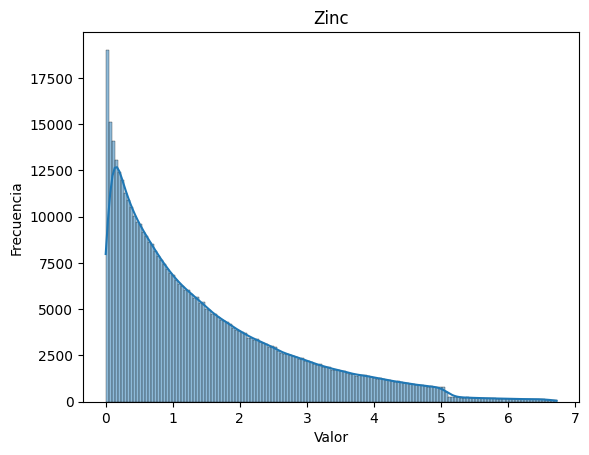

In [32]:
plt.figure()
sns.histplot(df['Zinc'], kde=True)
plt.title('Zinc')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

* <p>Análisis de Zinc 📝 Después de eliminar los valores nulos y los outliers, se eliminaron solo 4,594 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, pasó de 1.53 a 1.46, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por arriba del promedio general. La desviación estándar también se redujo de 1.50 a 1.42, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo no cambió y el máximo paso de 28.36 a 6.72, lo que confirma que se eliminaron los valores más extremos en el extremo superior del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable

El limite del código alimentario argentino para nitratos es de 5 mg/l, se considera que utiliza esta unidad ya que tiene coherencia. </p>

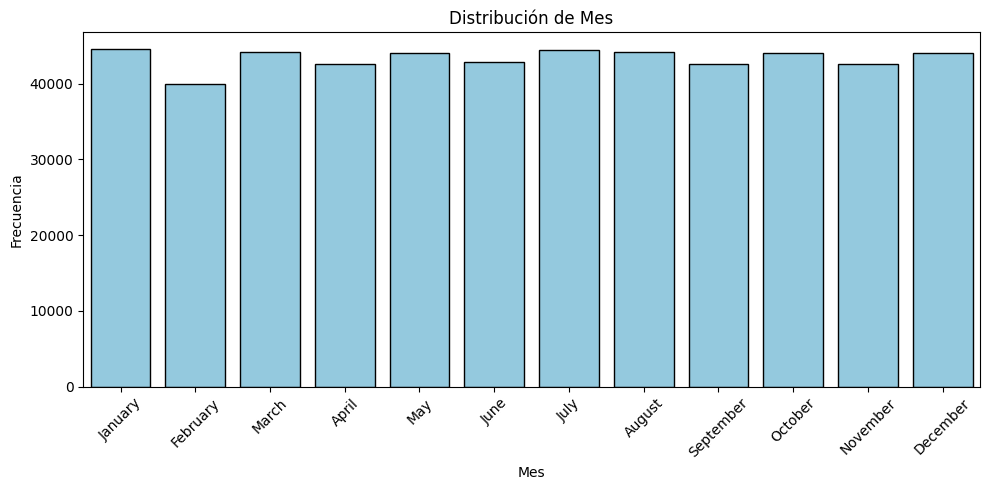

In [29]:
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Mes', order=orden_meses, color='skyblue', edgecolor='black')

plt.title('Distribución de Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rota las etiquetas para mejor lectura
plt.tight_layout()
plt.show()

In [ ]:
# Ver distribuicion de las columnas más relevantes:
columnas = ['pH', 'Total Dissolved Solids', 'Conductivity']

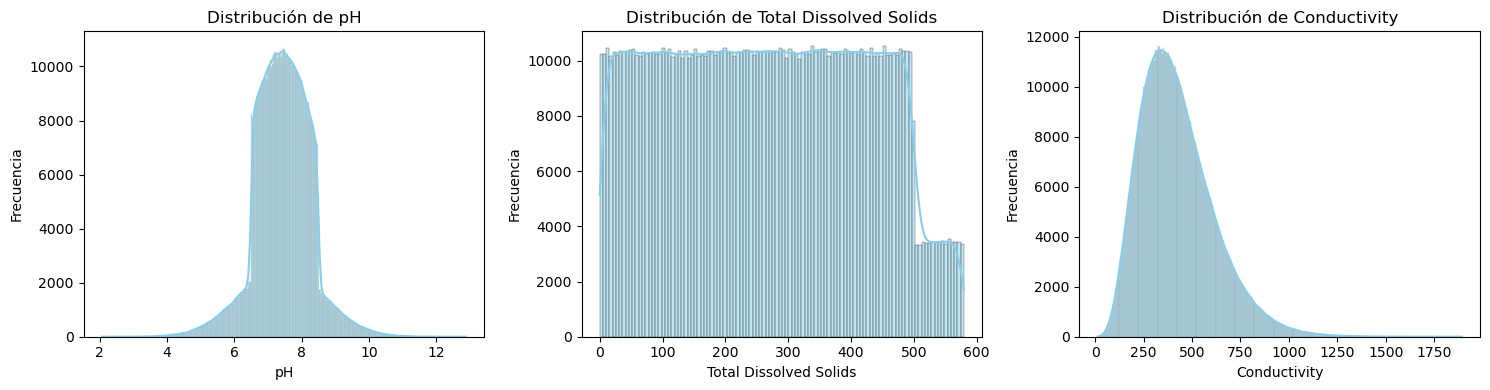

In [ ]:
fig, axes = plt.subplots(1, len(columnas), figsize=(5 * len(columnas), 4))

for i, col in enumerate(columnas):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()
